In [273]:
import numpy as np
import scipy.stats as stats
import scipy.special as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
def f(L, z):
    x, y = L[0], L[1]
    return (
        np.power(z * x, 2)
        + np.power(y / z, 2)
        - np.cos(2 * np.pi * x)
        - np.cos(2 * np.pi * y)
    )

In [3]:
res2 = opt.minimize(f, x0=(1, 2), args=2, method="BFGS")
print(res2)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.0125323577209524
        x: [ 1.409e-07  1.975e+00]
      nit: 6
      jac: [ 7.048e-06  3.651e-06]
 hess_inv: [[ 2.137e-02  2.198e-04]
            [ 2.198e-04  2.546e-02]]
     nfev: 30
     njev: 10


In [65]:
mk = {"method": "BFGS", "args": 2}
res = opt.basinhopping(f, x0=(1, 2), minimizer_kwargs=mk)
print(res)

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -2.0
                          x: [ 1.358e-09  6.023e-10]
                        nit: 100
      minimization_failures: 0
                       nfev: 3369
                       njev: 1123
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -2.0
                                    x: [ 1.358e-09  6.023e-10]
                                  nit: 7
                                  jac: [ 4.172e-07  3.278e-07]
                             hess_inv: [[ 2.140e-02  3.244e-04]
                                        [ 3.244e-04  2.532e-02]]
                                 nfev: 30
                                 njev: 10


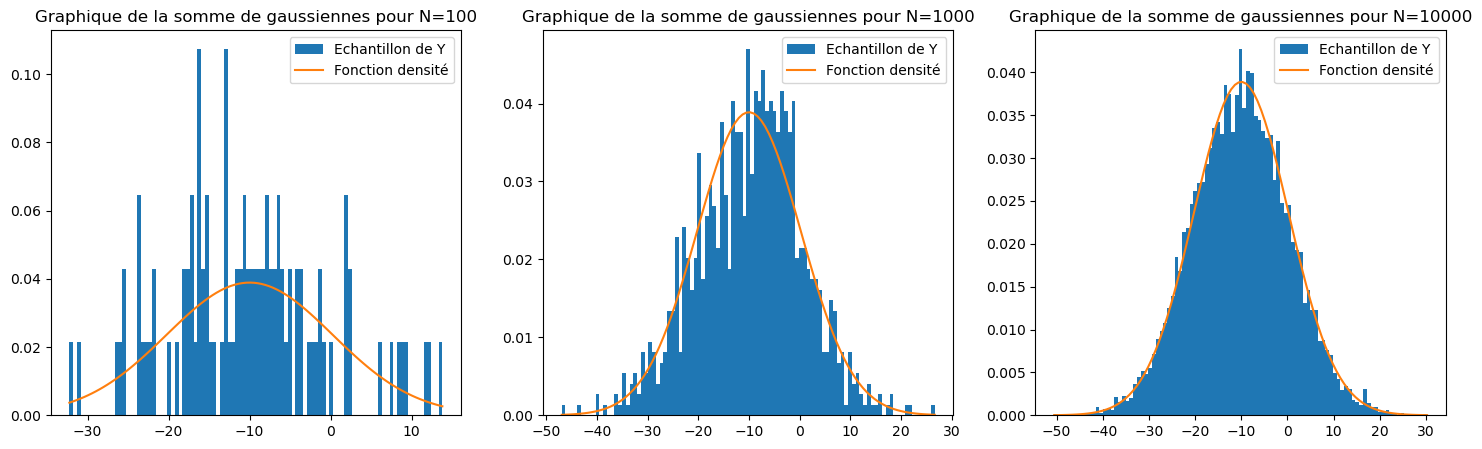

In [92]:
plt.figure(figsize=(18, 5))
for i, nb_repl in enumerate([100, 1000, 10000]):
    plt.subplot(1, 3, i + 1)
    sample_X1 = np.random.normal(0, 1, nb_repl)
    sample_X2 = np.random.normal(3, np.sqrt(5), nb_repl)
    sample_e = np.random.normal(0, np.sqrt(1 / 4), nb_repl)
    Y = 5 * sample_X1 - 4 * sample_X2 + 2 + sample_e

    intervalle = np.linspace(np.min(Y), np.max(Y), 100)
    plt.hist(Y, bins=intervalle, density=True, label="Echantillon de Y")

    densite = stats.norm(-10, np.sqrt(105.25)).pdf
    plt.plot(intervalle, densite(intervalle), label="Fonction densité")

    plt.title(f"Graphique de la somme de gaussiennes pour N={nb_repl}")
    plt.legend()

In [172]:
def theta_hat(Y):
    return np.mean(Y)


def sigma_hat(Y):
    return 1 / nb_repl * np.sum(np.power(Y - theta_hat(Y), 2))

In [173]:
def log_likehood_gauss(X, Y):
    theta, sigma_2 = X[0], X[1]
    return (
        1 / 2 * np.log(2 * np.pi)
        + 1 / 2 * np.log(sigma_2)
        + 1 / (2 * nb_repl * sigma_2) * np.sum(np.power(Y - theta, 2))
    )

In [204]:
nb_repl = 5000
sample_X1 = np.random.normal(0, 1, nb_repl)
sample_X2 = np.random.normal(3, np.sqrt(5), nb_repl)
sample_e = np.random.normal(0, np.sqrt(1 / 4), nb_repl)
Y = 5 * sample_X1 - 4 * sample_X2 + 2 + sample_e

mk = {"method": "BFGS", "args": Y}
res = opt.basinhopping(log_likehood_gauss, x0=(-1, 98.75), minimizer_kwargs=mk)
print(res.x)
print([theta_hat(Y), sigma_hat(Y)])
print(np.allclose([theta_hat(Y), sigma_hat(Y)], res.x))

[-10.15254483 105.22161157]
[-10.152550623018831, 105.22156995434973]
True


In [258]:
def simule(a, b, n):
    X = np.random.gamma(a, 1 / b, n)
    intervalle = np.linspace(0, np.max(X), 100)
    plt.hist(X, bins=intervalle, density=True, label="Echantillon de X")

    densite = stats.gamma.pdf(intervalle, a, 0, 1 / b)
    plt.plot(intervalle, densite, label="Fonction densité Gamma(2, 1)")
    plt.legend()

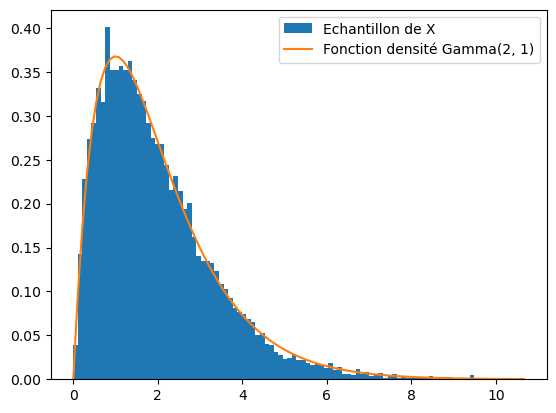

In [259]:
simule(2, 1, 10000)

In [290]:
def log_likehood_gamma(X, sample):
    a, b = X[0], X[1]
    n = len(sample)
    return (
        -n * a * np.log(b)
        + n * np.log(sp.gamma(a))
        - (a - 1) * np.sum(np.log(sample))
        + b * np.sum(sample)
    )

In [296]:
nb_repl = 1000
a, b = 2, 1

sample = np.random.gamma(a, 1 / b, nb_repl)
mk = {"method": "BFGS", "args": sample}
res = opt.basinhopping(log_likehood_gamma, x0=(1, 1), minimizer_kwargs=mk)
print(res.x)

[1.99590773 0.96694005]


/tmp/ipykernel_360/437431687.py:4: RuntimeWarning: invalid value encountered in log
  return -n*a*np.log(b) + n * np.log(sp.gamma(a)) - (a-1) * np.sum(np.log(sample)) + b * np.sum(sample)
/tmp/ipykernel_360/437431687.py:4: RuntimeWarning: divide by zero encountered in log
  return -n*a*np.log(b) + n * np.log(sp.gamma(a)) - (a-1) * np.sum(np.log(sample)) + b * np.sum(sample)
/tmp/ipykernel_360/437431687.py:4: RuntimeWarning: invalid value encountered in log
  return -n*a*np.log(b) + n * np.log(sp.gamma(a)) - (a-1) * np.sum(np.log(sample)) + b * np.sum(sample)
/tmp/ipykernel_360/437431687.py:4: RuntimeWarning: divide by zero encountered in log
  return -n*a*np.log(b) + n * np.log(sp.gamma(a)) - (a-1) * np.sum(np.log(sample)) + b * np.sum(sample)
/tmp/ipykernel_360/437431687.py:4: RuntimeWarning: invalid value encountered in log
  return -n*a*np.log(b) + n * np.log(sp.gamma(a)) - (a-1) * np.sum(np.log(sample)) + b * np.sum(sample)
/tmp/ipykernel_360/437431687.py:4: RuntimeWarning: divide 